In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.tree
import joblib
import numpy as np

### Exploring the data 

In [2]:
filename = 'wine_data.xlsx'
df = pd.read_excel(filename)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

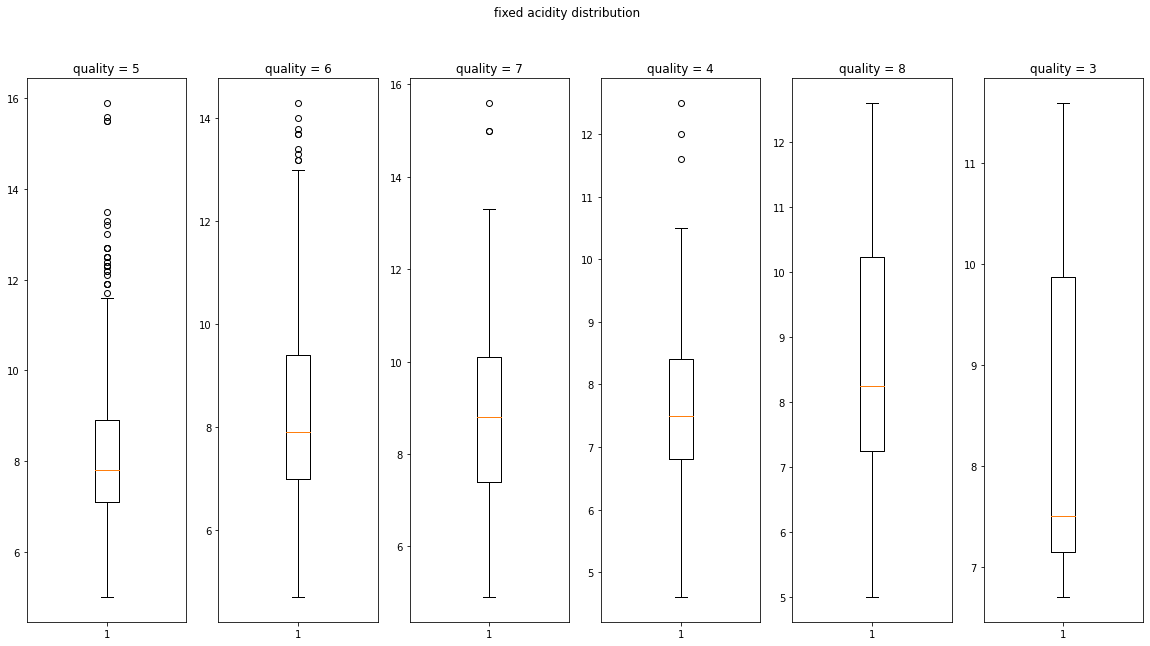

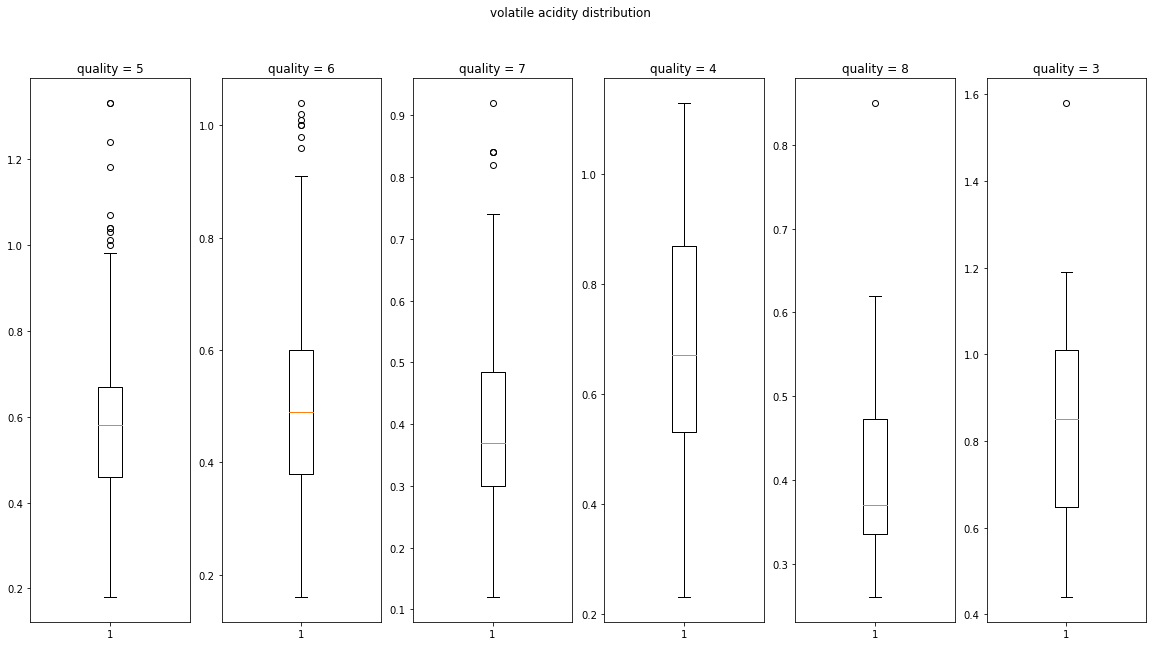

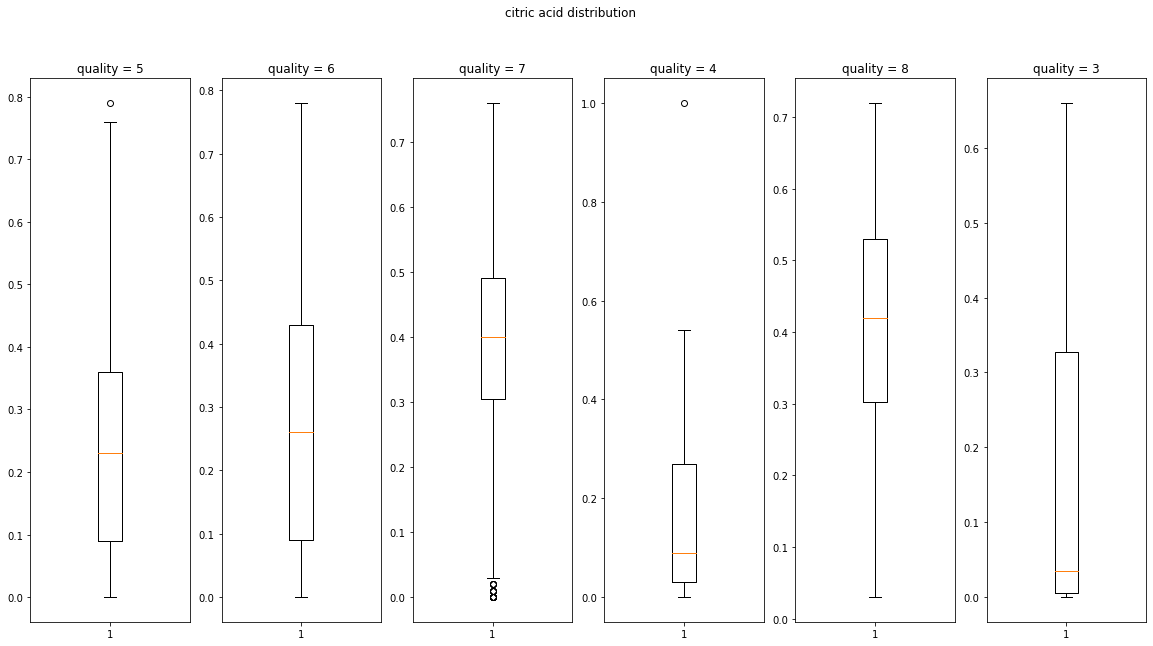

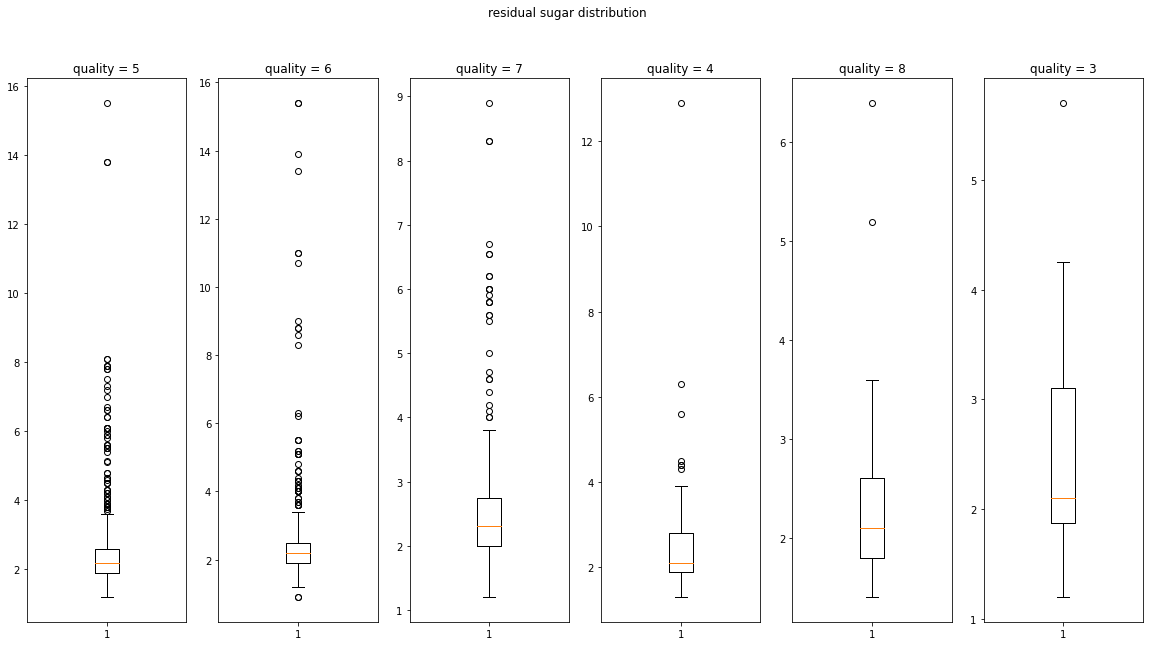

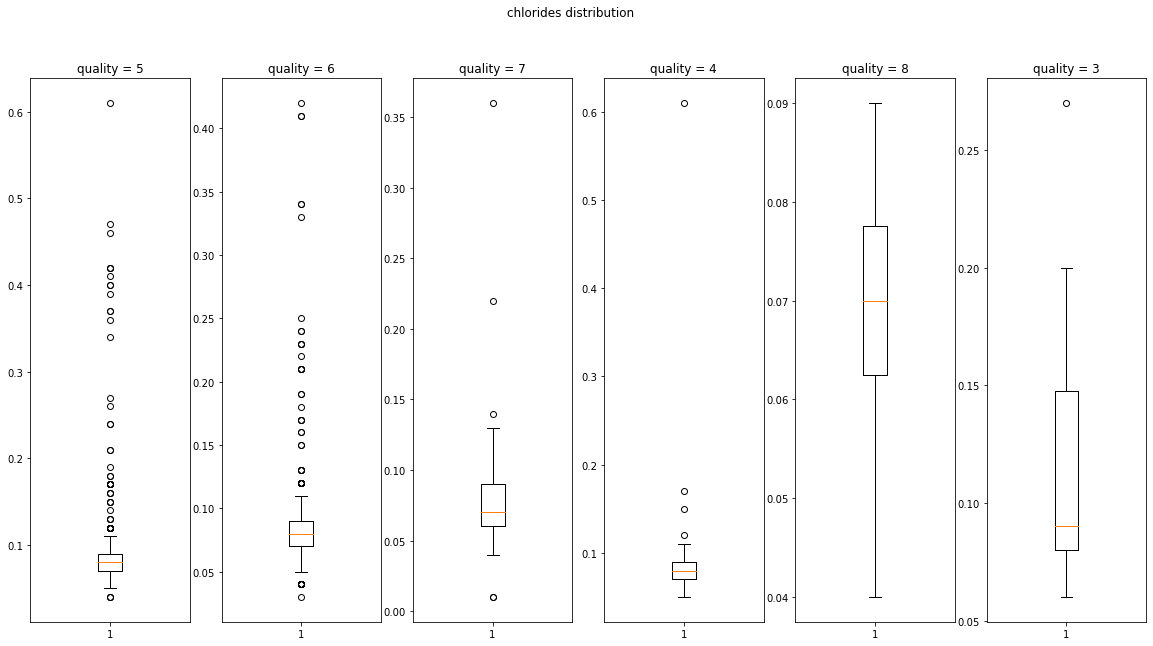

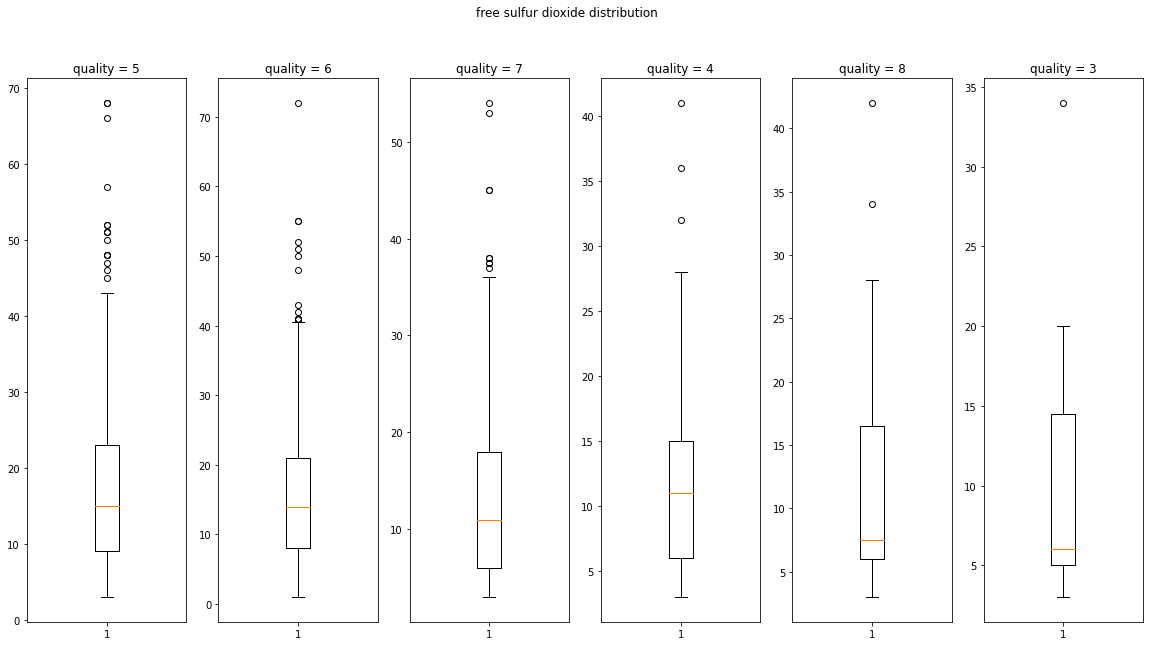

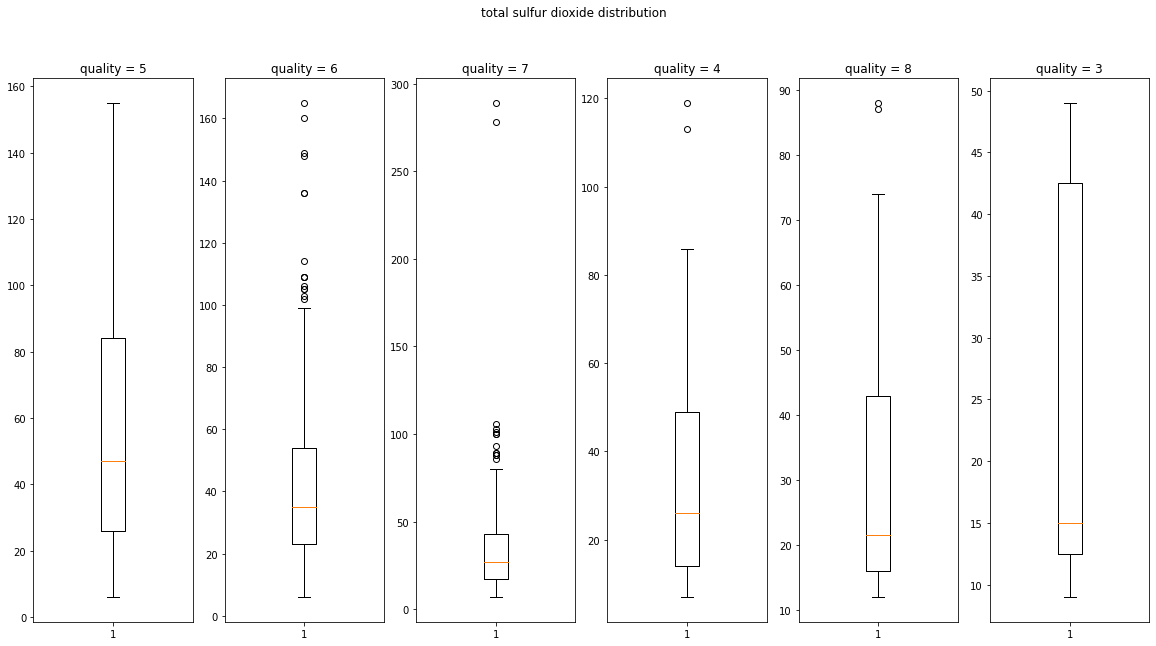

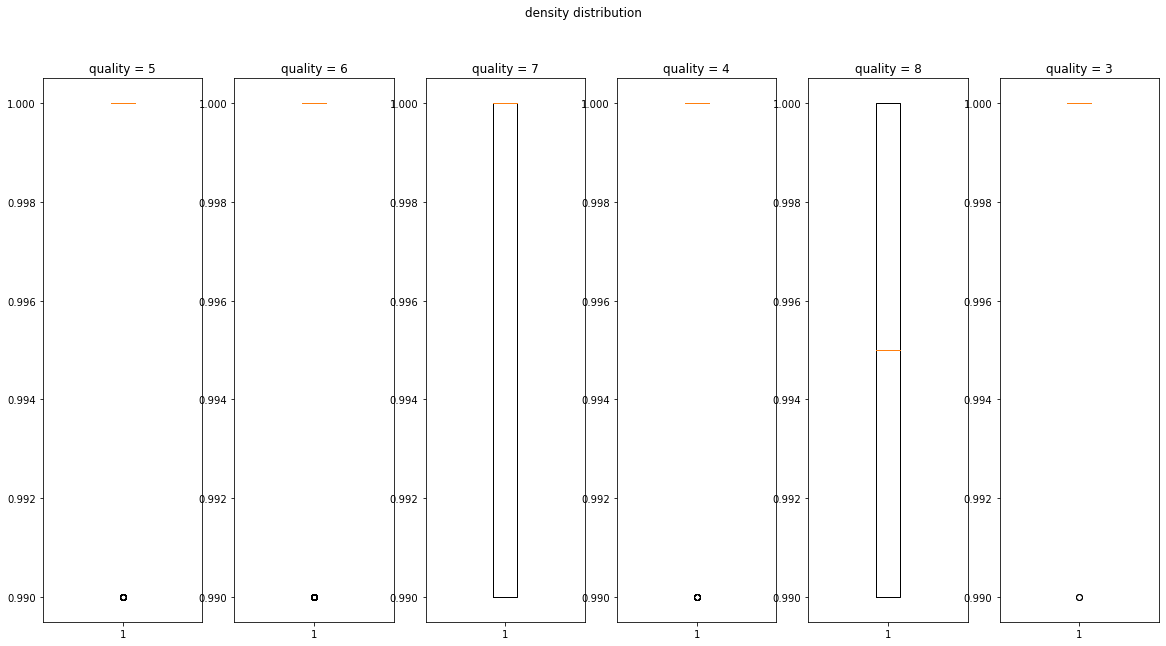

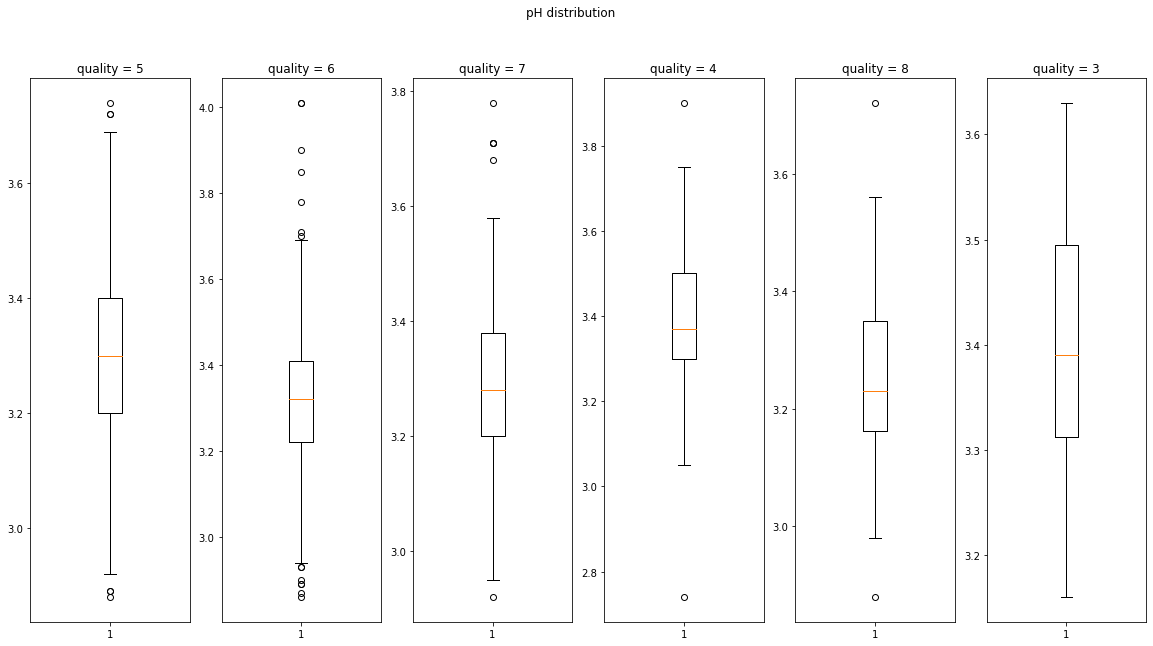

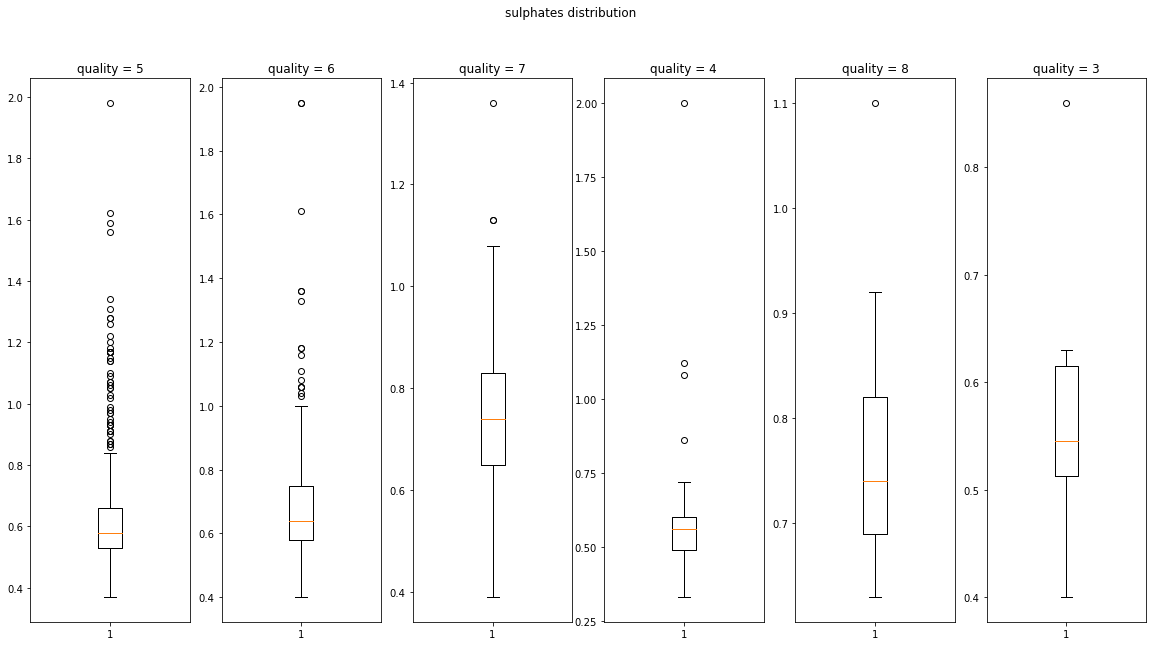

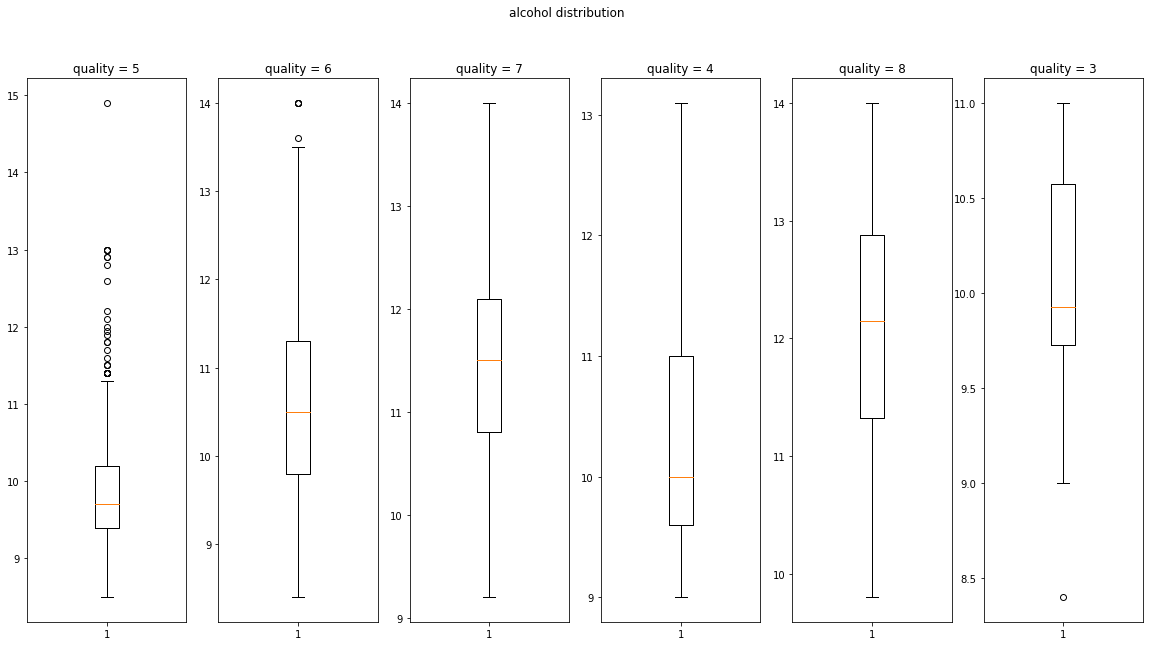

In [5]:
features = list(df.columns)
features.remove('quality')
classes = list(df['quality'].unique())
num_of_classes = len(classes)

for feature in features:
    plt.figure(figsize=(20, 10))
    for k, elem in enumerate(classes):
        plt.subplot(1, num_of_classes, k+1)
        plt.boxplot(df[feature].loc[df['quality'] == elem])
        plt.suptitle(f'{feature} distribution')
        plt.title(f'quality = {elem}')


**Features to consider when training a model**: *volatile acidity*, *citric acid*, *free sulfur dioxide*, *total sulfur dioxide*, *pH*, *sulphates*, *alcohol*

### Training and evaluating models

In [7]:
features = [
                'volatile acidity', 'citric acid', 'free sulfur dioxide', 
                'total sulfur dioxide','pH', 'sulphates', 'alcohol'
            ]
label = 'quality'

X = df[features]
y = df[label]

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 1119
Test cases: 480


**Logistic regression model**

In [8]:
# Creating pipeline and training the model
reg = 0.01

numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
        
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])

model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Accuracy score: 0.6125
Overall Precision: 0.5715601955707005
Overall Recall: 0.6125


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


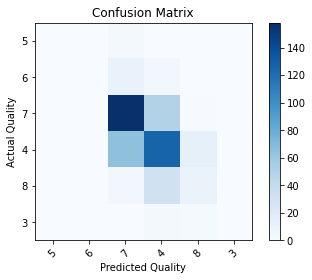

In [9]:
# Evaluating the model

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
print("Overall Precision:",precision_score(y_test, predictions, average='weighted'))
print("Overall Recall:",recall_score(y_test, predictions, average='weighted'))

cm = confusion_matrix(y_test, predictions)
classes = list(df['quality'].unique())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.show()

Average AUC: 0.798647383053113


D:\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
D:\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
D:\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


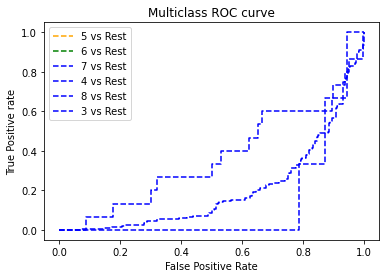

In [10]:
# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=str(classes[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=str(classes[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=str(classes[2]) + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label=str(classes[3]) + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='blue', label=str(classes[4]) + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='blue', label=str(classes[5]) + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

**Decision tree**

Accuracy score: 0.59375
Overall Precision: 0.50802306339849
Overall Recall: 0.59375
max_depth_range: 1


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


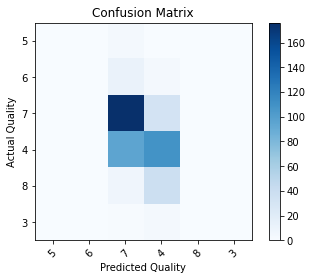

Accuracy score: 0.5395833333333333
Overall Precision: 0.5409615171275839
Overall Recall: 0.5395833333333333
max_depth_range: 2


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


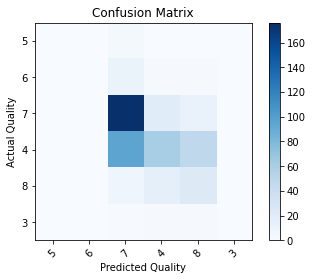

Accuracy score: 0.5166666666666667
Overall Precision: 0.5226316855969712
Overall Recall: 0.5166666666666667
max_depth_range: 3


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


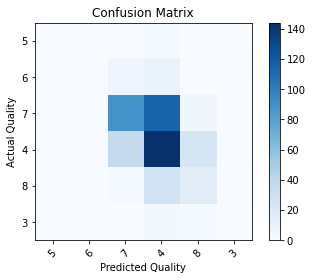

Accuracy score: 0.5916666666666667
Overall Precision: 0.5581707036253472
Overall Recall: 0.5916666666666667
max_depth_range: 4


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


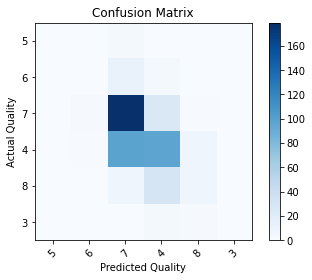

Accuracy score: 0.5895833333333333
Overall Precision: 0.5591482426303855
Overall Recall: 0.5895833333333333
max_depth_range: 5


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


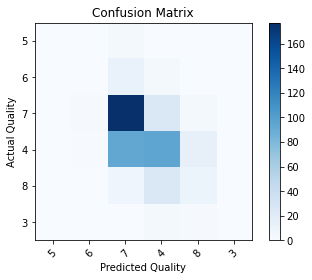

Accuracy score: 0.58125
Overall Precision: 0.5656291858242899
Overall Recall: 0.58125
max_depth_range: 6


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


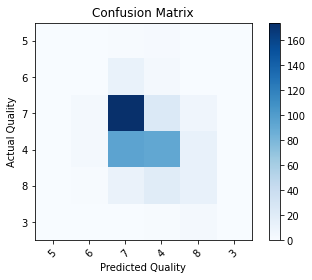

Accuracy score: 0.5979166666666667
Overall Precision: 0.5827836962848683
Overall Recall: 0.5979166666666667
max_depth_range: 7


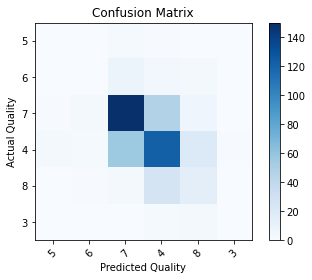

Accuracy score: 0.5479166666666667
Overall Precision: 0.5474642339133153
Overall Recall: 0.5479166666666667
max_depth_range: 8


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


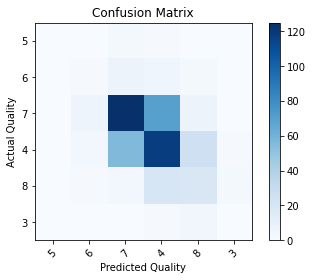

Accuracy score: 0.5458333333333333
Overall Precision: 0.5446811868686867
Overall Recall: 0.5458333333333333
max_depth_range: 9


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


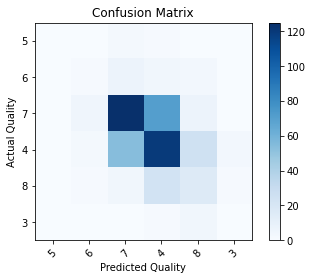

Accuracy score: 0.5416666666666666
Overall Precision: 0.5411929919000026
Overall Recall: 0.5416666666666666
max_depth_range: 10


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


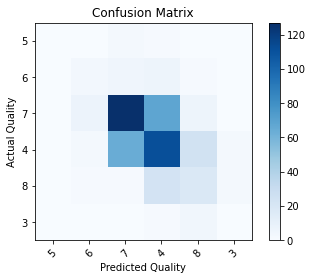

Accuracy score: 0.5708333333333333
Overall Precision: 0.5794968533975472
Overall Recall: 0.5708333333333333
max_depth_range: 15


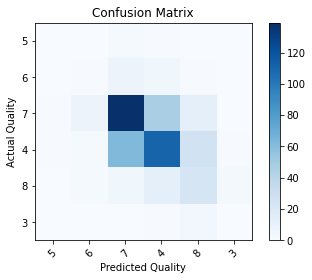

Accuracy score: 0.5854166666666667
Overall Precision: 0.5970056196080785
Overall Recall: 0.5854166666666667
max_depth_range: 20


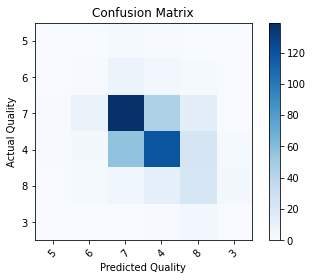

Accuracy score: 0.5854166666666667
Overall Precision: 0.5970056196080785
Overall Recall: 0.5854166666666667
max_depth_range: 50


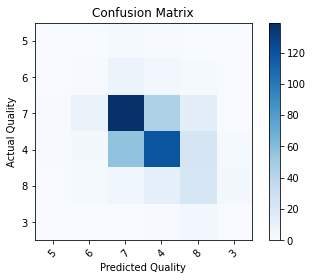

Accuracy score: 0.5854166666666667
Overall Precision: 0.5970056196080785
Overall Recall: 0.5854166666666667
max_depth_range: 100


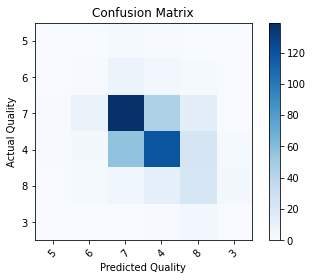

In [11]:
#Trying out different max_depth values, to see with wich value the model achieves the best results

max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,15, 20, 50, 100]

for depth in max_depth_range:
    # Creating pipeline and training the model
    numeric_features = [0, 1, 2, 3, 4, 5, 6]
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('tree', sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=depth))])

    model = pipeline.fit(X_train, y_train)

    predictions = model.predict(X_test)
    y_scores = model.predict_proba(X_test)

    print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
    print("Overall Precision:",precision_score(y_test, predictions, average='weighted'))
    print("Overall Recall:",recall_score(y_test, predictions, average='weighted'))
    print(f"max_depth_range: {depth}")

    cm = confusion_matrix(y_test, predictions)
    classes = list(df['quality'].unique())
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion Matrix')
    plt.xlabel("Predicted Quality")
    plt.ylabel("Actual Quality")
    plt.show()

*Best accuracy score (0.598) has been achieved with max_depth_range = 7*

**Random Forest Classifier**

Accuracy score: 0.58125
Overall Precision: 0.5977308120133481
Overall Recall: 0.58125
n_estimators = 2


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


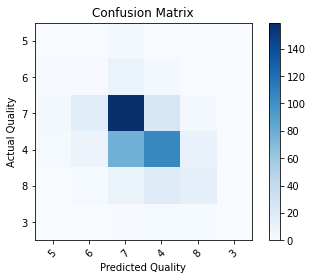

Accuracy score: 0.63125


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall Precision: 0.6154288899634645
Overall Recall: 0.63125
n_estimators = 5


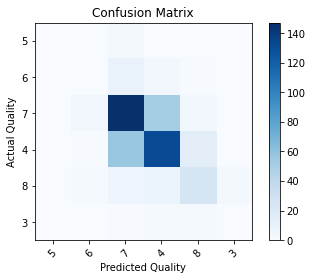

Accuracy score: 0.6458333333333334
Overall Precision: 0.6225395114942529
Overall Recall: 0.6458333333333334
n_estimators = 10


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


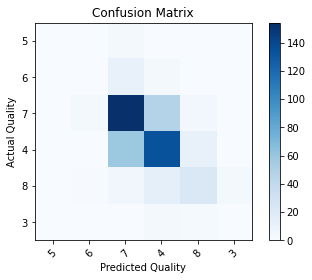

Accuracy score: 0.6645833333333333
Overall Precision: 0.6406810241242663
Overall Recall: 0.6645833333333333
n_estimators = 20


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


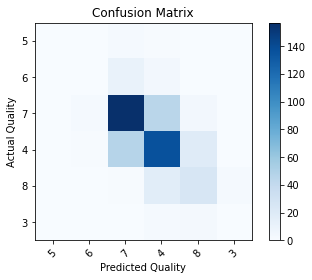

Accuracy score: 0.6729166666666667
Overall Precision: 0.6473685004681806
Overall Recall: 0.6729166666666667
n_estimators = 50


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


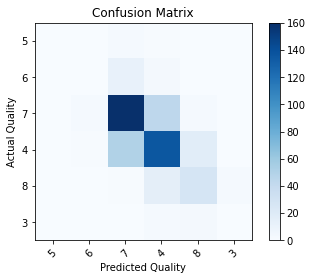

Accuracy score: 0.6708333333333333
Overall Precision: 0.6432738095238096
Overall Recall: 0.6708333333333333
n_estimators = 75


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


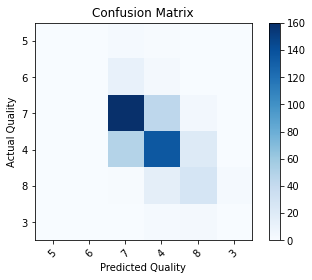

Accuracy score: 0.6875
Overall Precision: 0.6585719320207309
Overall Recall: 0.6875
n_estimators = 100


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


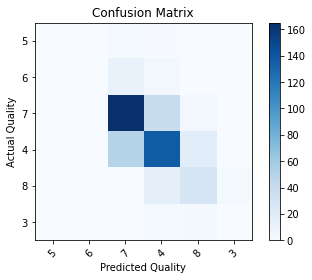

Accuracy score: 0.6791666666666667
Overall Precision: 0.6505243453729518
Overall Recall: 0.6791666666666667
n_estimators = 150


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


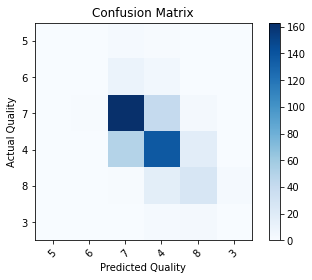

Accuracy score: 0.6895833333333333
Overall Precision: 0.6607355442176871
Overall Recall: 0.6895833333333333
n_estimators = 200


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


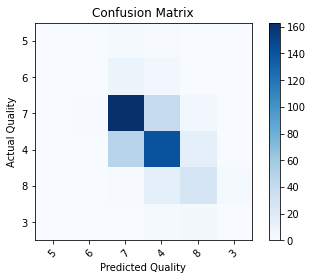

Accuracy score: 0.6895833333333333
Overall Precision: 0.6597654428904428
Overall Recall: 0.6895833333333333
n_estimators = 300


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


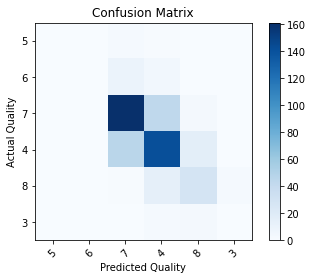

In [12]:
# Creating pipeline and training the model
# Trying out different amount of trees in the model

n_estimators = [2, 5, 10, 20, 50, 75, 100, 150, 200, 300]

for n in n_estimators:
    numeric_features = [0, 1, 2, 3, 4, 5, 6]
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('forest', RandomForestClassifier(n_estimators=n, random_state=2, verbose=False))])

    model = pipeline.fit(X_train, y_train)

    predictions = model.predict(X_test)
    y_scores = model.predict_proba(X_test)

    print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
    print("Overall Precision:",precision_score(y_test, predictions, average='weighted'))
    print("Overall Recall:",recall_score(y_test, predictions, average='weighted'))
    print(f"n_estimators = {n}")
    cm = confusion_matrix(y_test, predictions)
    classes = list(df['quality'].unique())
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion Matrix')
    plt.xlabel("Predicted Quality")
    plt.ylabel("Actual Quality")
    plt.show()


*Best results have been achieved for n_estimators = 200*
*Accuracy score: 0.6895833333333333*
*Overall Precision: 0.6607355442176871*
*Overall Recall: 0.6895833333333333*

Accuracy score: 0.6166666666666667
Overall Precision: 0.5274343785079072
Overall Recall: 0.6166666666666667
max_depth = 2


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


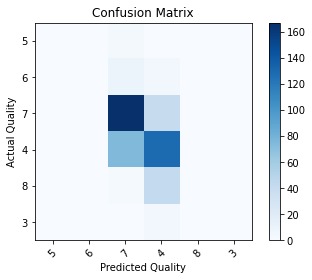

Accuracy score: 0.6479166666666667
Overall Precision: 0.6127625846375846
Overall Recall: 0.6479166666666667
max_depth = 4


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


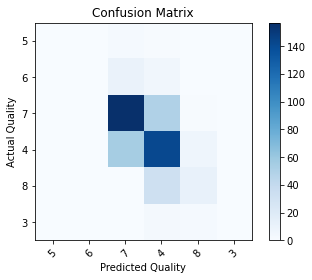

Accuracy score: 0.65625
Overall Precision: 0.6207107412253002
Overall Recall: 0.65625
max_depth = 6


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


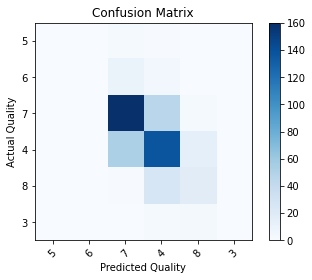

Accuracy score: 0.66875
Overall Precision: 0.6358660728493812
Overall Recall: 0.66875
max_depth = 8


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


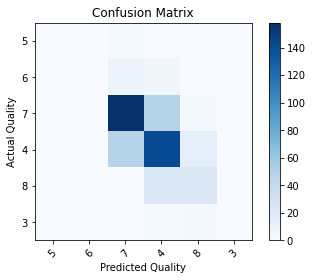

Accuracy score: 0.69375
Overall Precision: 0.6604821580288871
Overall Recall: 0.69375
max_depth = 10


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


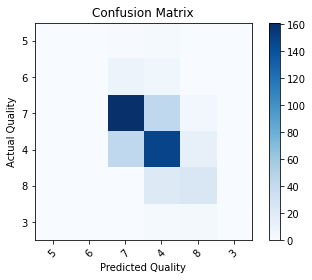

Accuracy score: 0.6854166666666667
Overall Precision: 0.6560087739166073
Overall Recall: 0.6854166666666667
max_depth = 15


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


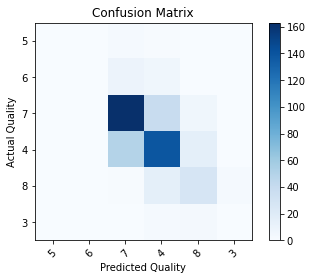

Accuracy score: 0.6916666666666667
Overall Precision: 0.6622668040138265
Overall Recall: 0.6916666666666667
max_depth = 20


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


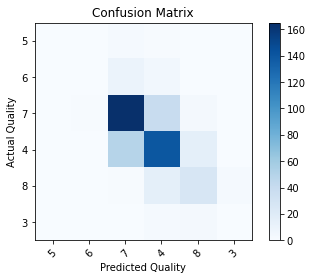

Accuracy score: 0.6895833333333333
Overall Precision: 0.6607355442176871
Overall Recall: 0.6895833333333333
max_depth = 50


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


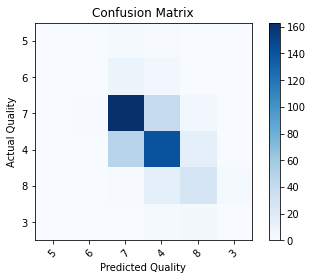

Accuracy score: 0.6895833333333333
Overall Precision: 0.6607355442176871
Overall Recall: 0.6895833333333333
max_depth = 100


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


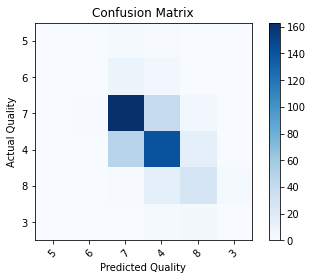

In [13]:
#Trying out different values for max_depth parameter

max_depths = [2, 4, 6, 8, 10, 15, 20, 50, 100]

for m in max_depths:
    numeric_features = [0, 1, 2, 3, 4, 5, 6]
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('forest', RandomForestClassifier(
                                                                    n_estimators=200, 
                                                                     random_state=2, 
                                                                     verbose=False,
                                                                     max_depth=m
                                                                ))])

    model = pipeline.fit(X_train, y_train)

    predictions = model.predict(X_test)
    y_scores = model.predict_proba(X_test)

    print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
    print("Overall Precision:",precision_score(y_test, predictions, average='weighted'))
    print("Overall Recall:",recall_score(y_test, predictions, average='weighted'))
    print(f"max_depth = {m}")
    cm = confusion_matrix(y_test, predictions)
    classes = list(df['quality'].unique())
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion Matrix')
    plt.xlabel("Predicted Quality")
    plt.ylabel("Actual Quality")
    plt.show()


*Best results have been achieved for max_depth = 10:
Accuracy score: 0.69375
Overall Precision: 0.6604821580288871
Overall Recall: 0.69375*

**Reducing the amount of unique classes from 6 to 3**

*Unique classes: 4, 6, 8*

In [14]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
df.loc[df['quality'] == 5] = 4
df.loc[df['quality'] == 3] = 4
df.loc[df['quality'] == 7] = 8

In [16]:
df['quality'].unique()

array([4, 6, 8], dtype=int64)

Accuracy score: 0.9604166666666667
Overall Precision: 0.962554717185848
Overall Recall: 0.9604166666666667


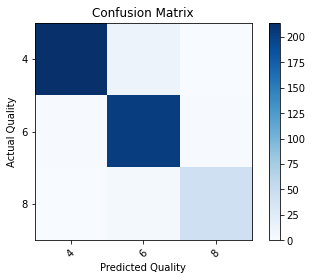

In [17]:
features = [
                'volatile acidity', 'citric acid', 'free sulfur dioxide', 
                'total sulfur dioxide','pH', 'sulphates', 'alcohol'
            ]
label = 'quality'

X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('forest', RandomForestClassifier(
                                                                n_estimators=200, 
                                                                 random_state=2, 
                                                                 verbose=False,
                                                                 max_depth=10
                                                            ))])

model = pipeline.fit(X_train, y_train)

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
print("Overall Precision:",precision_score(y_test, predictions, average='weighted'))
print("Overall Recall:",recall_score(y_test, predictions, average='weighted'))
cm = confusion_matrix(y_test, predictions)
classes = sorted(list(df['quality'].unique()))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.show()


*Unique classes: 3, 5, 8*

In [18]:
df = pd.read_excel(filename)
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
df = pd.read_excel(filename)

df.loc[df['quality'] == 4] = 3
df.loc[df['quality'] == 6] = 5
df.loc[df['quality'] == 7] = 8

In [20]:
df['quality'].unique()

array([5, 8, 3], dtype=int64)

In [21]:
df['quality'].value_counts()

5    1319
8     217
3      63
Name: quality, dtype: int64

Accuracy score: 0.9854166666666667
Overall Precision: 0.9854797412070344
Overall Recall: 0.9854166666666667


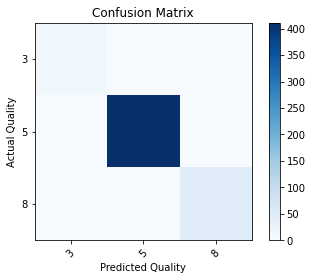

In [22]:
features = [
                'volatile acidity', 'citric acid', 'free sulfur dioxide', 
                'total sulfur dioxide','pH', 'sulphates', 'alcohol'
            ]
label = 'quality'

X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('forest', RandomForestClassifier(
                                                                n_estimators=200, 
                                                                 random_state=2, 
                                                                 verbose=False,
                                                                 max_depth=10
                                                            ))])

model = pipeline.fit(X_train, y_train)

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
print("Overall Precision:",precision_score(y_test, predictions, average='weighted'))
print("Overall Recall:",recall_score(y_test, predictions, average='weighted'))
cm = confusion_matrix(y_test, predictions)
classes = sorted(list(df['quality'].unique()))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.show()


In [23]:
y_test.value_counts()

5    412
8     50
3     18
Name: quality, dtype: int64

## Saving the model

In [25]:
model_name = 'rf_classifier.joblib'
joblib.dump(model, model_name)

['rf_classifier.joblib']

**Training and evaluating a model without excluding any of the features**

Accuracy score: 0.9833333333333333
Overall Precision: 0.9836507936507937
Overall Recall: 0.9833333333333333


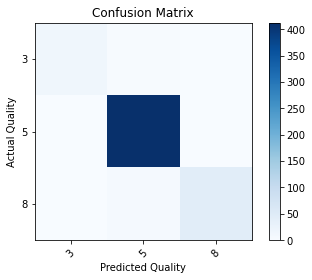

In [49]:
features = list(df.columns)
features.remove('quality')
label = 'quality'

X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('forest', RandomForestClassifier(
                                                                n_estimators=200, 
                                                                 random_state=2, 
                                                                 verbose=False,
                                                                 max_depth=10
                                                            ))])

model = pipeline.fit(X_train, y_train)

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
print("Overall Precision:",precision_score(y_test, predictions, average='weighted'))
print("Overall Recall:",recall_score(y_test, predictions, average='weighted'))
cm = confusion_matrix(y_test, predictions)
classes = sorted(list(df['quality'].unique()))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.show()
